In [380]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bigbasket-entire-product-list-28k-datapoints/BigBasket Products.csv


In [381]:
df = pd.read_csv('../input/bigbasket-entire-product-list-28k-datapoints/BigBasket Products.csv')
df = df.drop(columns = 'index')
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [382]:
df.sample(5)
# Getting random 5 rows

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
12982,Anti Ageing Face Wash With Hyluronic Acid & Ac...,Beauty & Hygiene,Skin Care,Globus,112.0,140.0,Face Care,3.5,This face wash by Globus rinses away dirt and ...
16650,Water Juice Glass Set - Victoria Cocktail,"Kitchen, Garden & Pets",Crockery & Cutlery,Ocean,697.0,697.0,Glassware,NaN,Ocean Victoria Cocktail Glasses - Set of 6 Per...
23496,Whisky Glass - Sylvana,"Kitchen, Garden & Pets",Crockery & Cutlery,Pasabahce,519.0,702.0,Glassware,5.0,These simple yet elegant-looking glasses are i...
11036,Oregano,Gourmet & World Food,Cooking & Baking Needs,Puramate,76.5,85.0,"Herbs, Seasonings & Rubs",5.0,Puramate dried oregano is enough to transform ...
21162,"Lunch Box-Tiffin Set - Stainless Steel,Blue - ...","Kitchen, Garden & Pets",Steel Utensils,Tedemei,695.0,695.0,Lunch Boxes,NaN,EAN Code: 40136051 Country of origin: India ...


In [383]:
df.shape
# Our dataset has 27555 rows and 9 columns

(27555, 9)

NaN değerlerinin eklenmesi

In [384]:
# NaN değerleri eklemek için bir oran belirleyelim
nan_percentage = 0.1  # Her sütuna %10 oranında NaN eklemek istiyoruz

# Her sütunun veri türünü kontrol edelim ve NaN değerlerini ekleyelim
for column in df.columns:
    # Numerik sütunlar için NaN değer ekleme
    if df[column].dtype in ['float64', 'int64']:
        nan_indices = np.random.choice(df.index, size=int(len(df) * nan_percentage), replace=False)
        df.loc[nan_indices, column] = np.nan
    
    # Kategorik sütunlar için NaN değer ekleme
    elif df[column].dtype == 'object':
        nan_indices = np.random.choice(df.index, size=int(len(df) * nan_percentage), replace=False)
        df.loc[nan_indices, column] = None  # Veya df[column] = np.nan

# NaN değerlerin eklendiğini kontrol edelim
print(df.isna().sum())

product          2756
category         2755
sub_category     2755
brand            2756
sale_price       2755
market_price     2755
type             2755
rating          10474
description      2859
dtype: int64


In [385]:
# İlk 10 satırı görüntüleyelim
df.head(10)

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,"Brass Angle Deep - Plain, No.2",None,Pooja Needs,None,119.0,250.0,None,3.4,"A perfect gift for all occasions, be it your m..."
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",NaN,Multipurpose container with an attractive desi...
4,Creme Soft Soap - For Hands & Body,None,Bath & Hand Wash,None,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
5,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.0,199.0,Disinfectant Spray & Cleaners,3.3,Stay protected from contamination with Multipu...
6,Multani Mati,Beauty & Hygiene,None,Satinance,58.0,58.0,Face Care,3.6,Satinance multani matti is an excellent skin t...
7,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.0,250.0,Hand Wash & Sanitizers,4.0,None
8,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.0,1098.0,Shampoo & Conditioner,3.5,None
9,"Scrub Pad - Anti- Bacterial, Regular",Cleaning & Household,"Mops, Brushes & Scrubs",None,20.0,20.0,"Utensil Scrub-Pad, Glove",4.3,None


In [386]:
df.info()
# Getting information about columns and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product       24799 non-null  object 
 1   category      24800 non-null  object 
 2   sub_category  24800 non-null  object 
 3   brand         24799 non-null  object 
 4   sale_price    24800 non-null  float64
 5   market_price  24800 non-null  float64
 6   type          24800 non-null  object 
 7   rating        17081 non-null  float64
 8   description   24696 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.9+ MB


In [387]:
df.shape

(27555, 9)

In [388]:
df.describe()
# Overall statistics about dataset

,sale_price,market_price,rating
count,24800.000000,24800.000000,17081.000000
mean,321.589680,383.858624,3.946479
std,482.031148,588.467870,0.735373
min,2.450000,3.000000,1.000000
25%,95.000000,101.000000,3.700000
50%,190.000000,220.000000,4.100000
75%,359.000000,425.000000,4.300000
max,12500.000000,12500.000000,5.000000


Tek Değişkenli Analiz


In [389]:
df.head()


,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,"Brass Angle Deep - Plain, No.2",None,Pooja Needs,None,119.0,250.0,None,3.4,"A perfect gift for all occasions, be it your m..."
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",NaN,Multipurpose container with an attractive desi...
4,Creme Soft Soap - For Hands & Body,None,Bath & Hand Wash,None,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


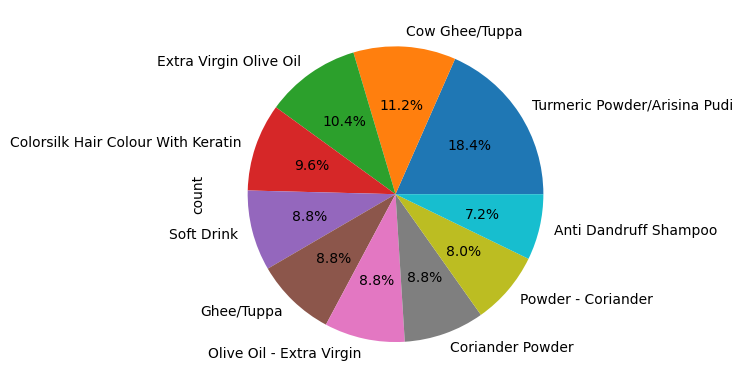

In [390]:
# Top 10 best sellers
df['product'].value_counts().head(10).plot(kind = 'pie', autopct = '%1.1f%%')
plt.show()

<Axes: >

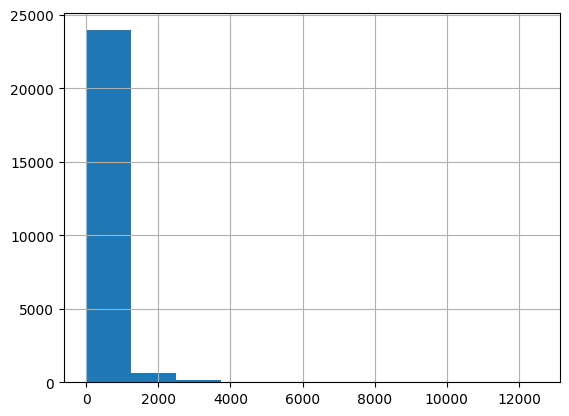

In [391]:
# Find the ditribution of sale_price

df['sale_price'].hist()
# Fiyatların çoğunun 0 ile 1000 arasında olduğu sağa çarpık dağılım görebiliriz

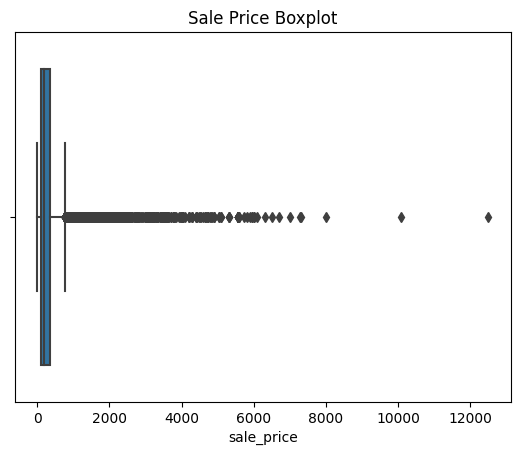

In [392]:
# Boxplot oluşturma (NaN değerlerini doğrudan atarak)
sns.boxplot(x=df['sale_price'], orient='h')
plt.title('Sale Price Boxplot')
plt.show()

İki Değişkenli Analiz

-0.07991504271041157


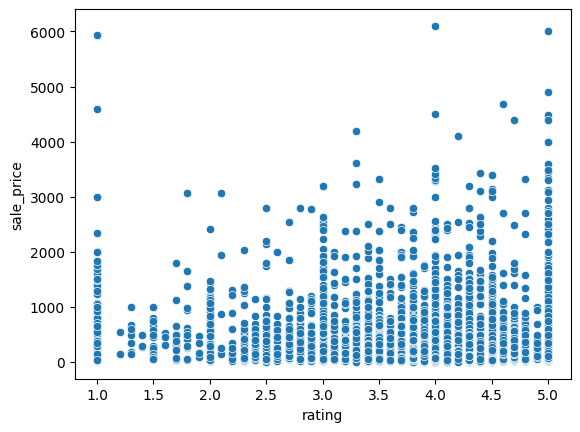

In [393]:
# sale_price ile derecelendirme arasında bir ilişki var mı? 
# ürün pahalıysa müşteriler ürünleri daha düşük puanlıyor mu?

sns.scatterplot(x = 'rating', y = 'sale_price', data = df)

# Correlation Coefficient
print(df['sale_price'].corr(df['rating']))

# Yani müşterinin verdiği puan ile ürünün fiyatı arasında bir ilişki yok,
# bu, müşterilerin ürünleri fiyatlarına göre (ucuz veya pahalı) derecelendirmediği anlamına gelir

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


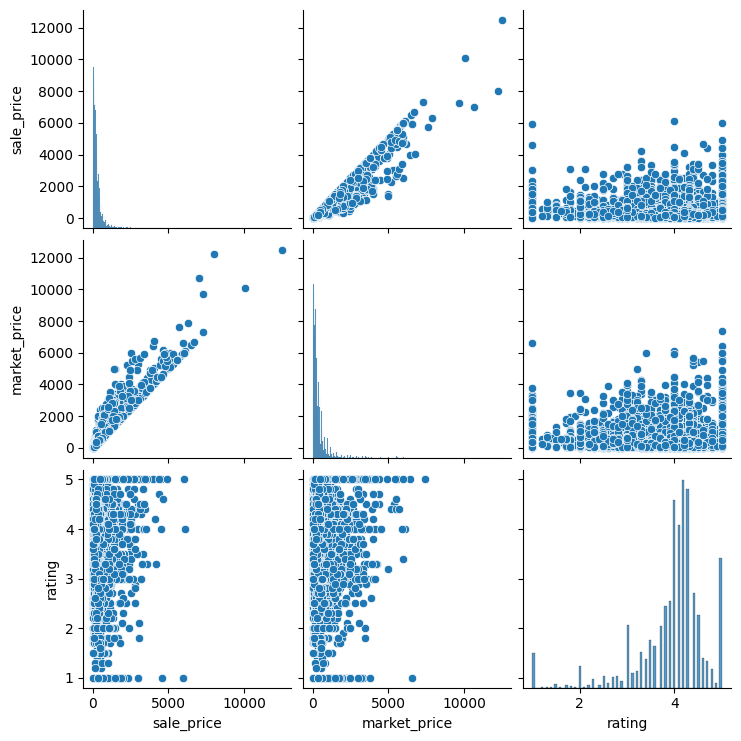

In [394]:
# Her sayısal değişkenin birbiriyle nasıl ilişkilendirildiğini görselleştirin

sns.pairplot(df)

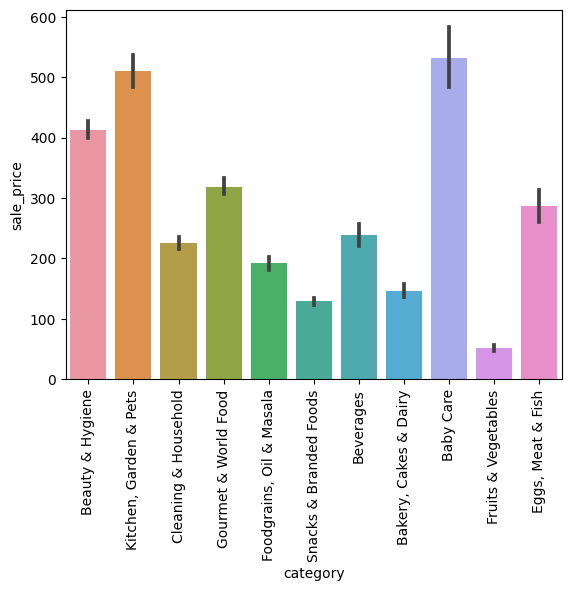

In [395]:
# Ortalama sale_price'in en yüksek olduğu kategorileri bulalım
sns.barplot(x = 'category', y = 'sale_price', data = df)
plt.xticks(rotation = 90)
plt.show()

# Ürün başına ortalama fiyatın en yüksek olduğu kategorinin 'Bebek Bakımı' olduğunu görüyoruz

<Axes: xlabel='brand', ylabel='market_price'>

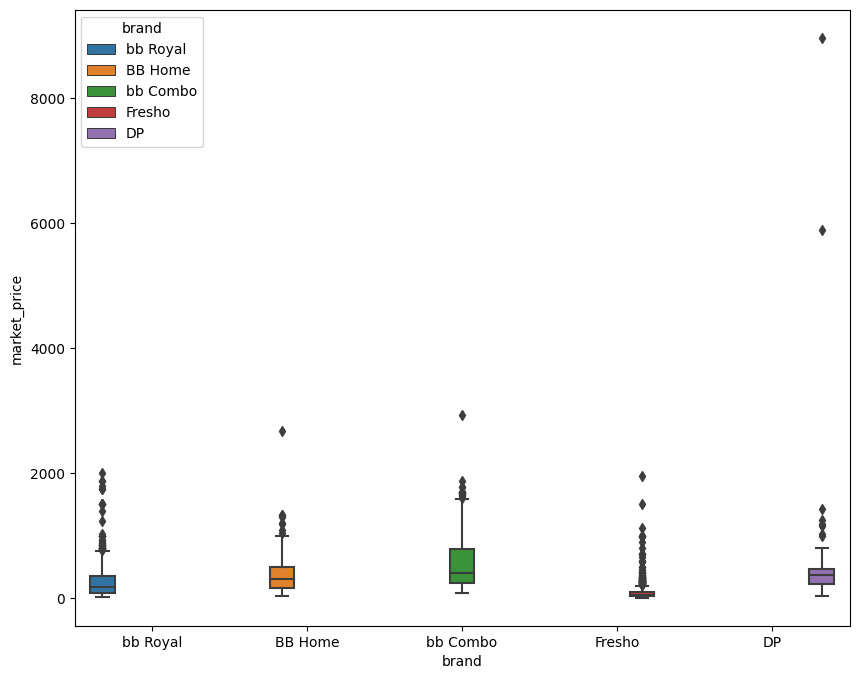

In [396]:
# En popüler 5 markanın piyasa fiyatını bulalım

brands_of_interest = df['brand'].value_counts().head(5)
df_filtered = df[df['brand'].isin(brands_of_interest.index)]

plt.figure(figsize=(10, 8))
sns.boxplot(x = 'brand', y = 'market_price', data = df_filtered, hue = 'brand')

<Axes: xlabel='brand', ylabel='market_price'>

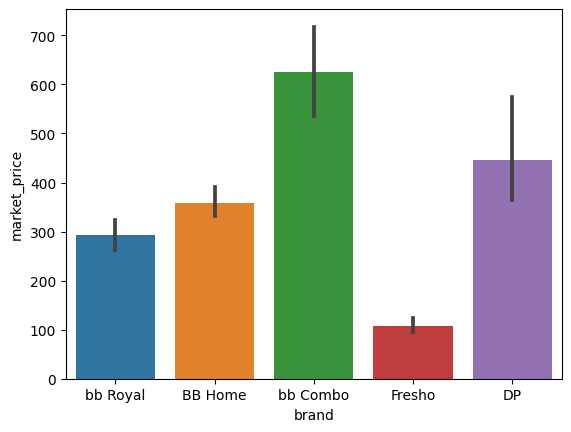

In [397]:

# En popüler 5 markanın ortalama piyasa fiyatını bulalım

sns.barplot(x = 'brand', y = 'market_price', data = df_filtered)

Aykırı Değerleri Bulma

In [398]:
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,"Brass Angle Deep - Plain, No.2",None,Pooja Needs,None,119.0,250.0,None,3.4,"A perfect gift for all occasions, be it your m..."
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",NaN,Multipurpose container with an attractive desi...
4,Creme Soft Soap - For Hands & Body,None,Bath & Hand Wash,None,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [399]:
# Kategori ve alt kategori dağılımı
category_counts = df['category'].value_counts()
sub_category_counts = df['sub_category'].value_counts()


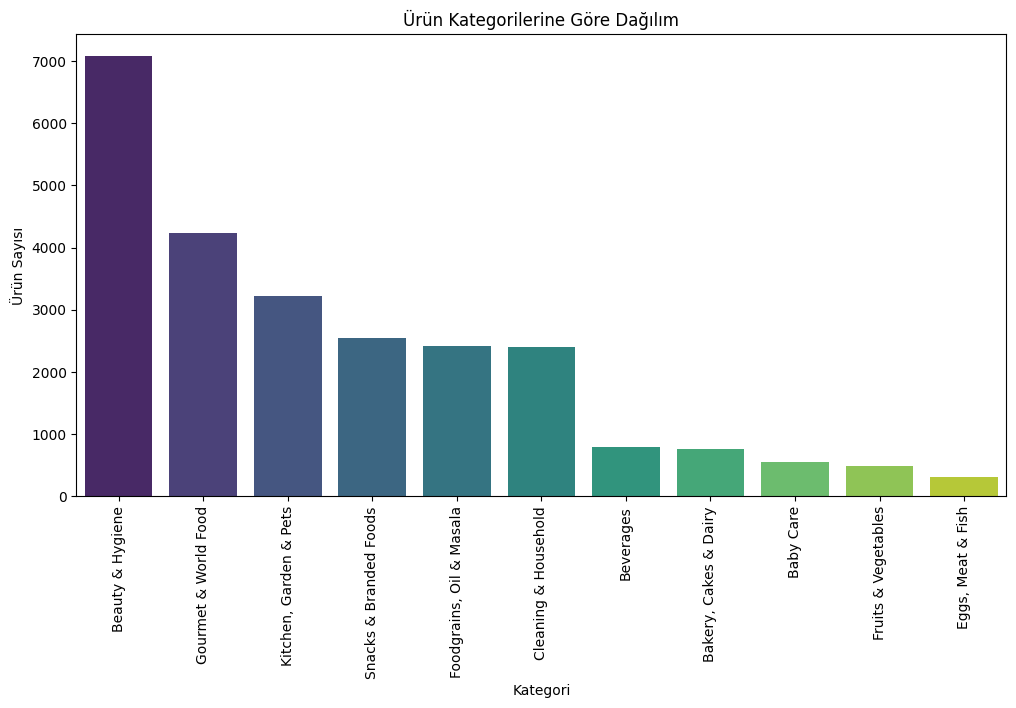

In [400]:
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title("Ürün Kategorilerine Göre Dağılım")
plt.xlabel("Kategori")
plt.ylabel("Ürün Sayısı")
plt.xticks(rotation=90)
plt.show()

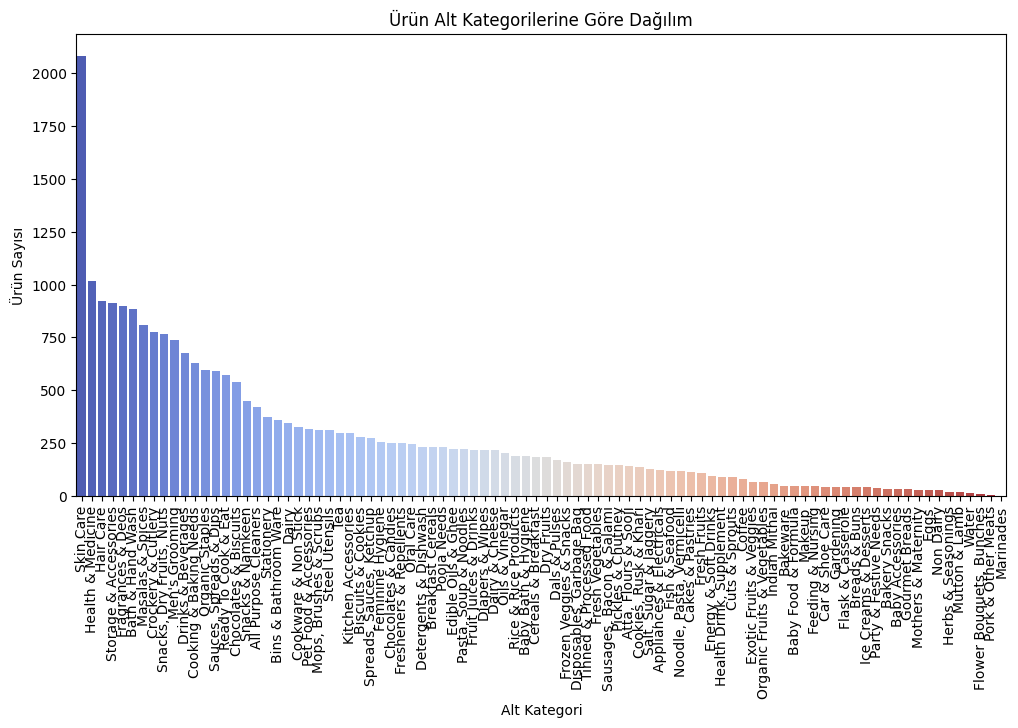

In [401]:
# Alt Kategori Dağılımı

plt.figure(figsize=(12, 6))
sns.barplot(x=sub_category_counts.index, y=sub_category_counts.values, palette='coolwarm')
plt.title("Ürün Alt Kategorilerine Göre Dağılım")
plt.xlabel("Alt Kategori")
plt.ylabel("Ürün Sayısı")
plt.xticks(rotation=90)
plt.show()


In [402]:
# İndirim hesaplama

df['discount'] = ((df['market_price'] - df['sale_price']) / df['market_price']) * 100

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


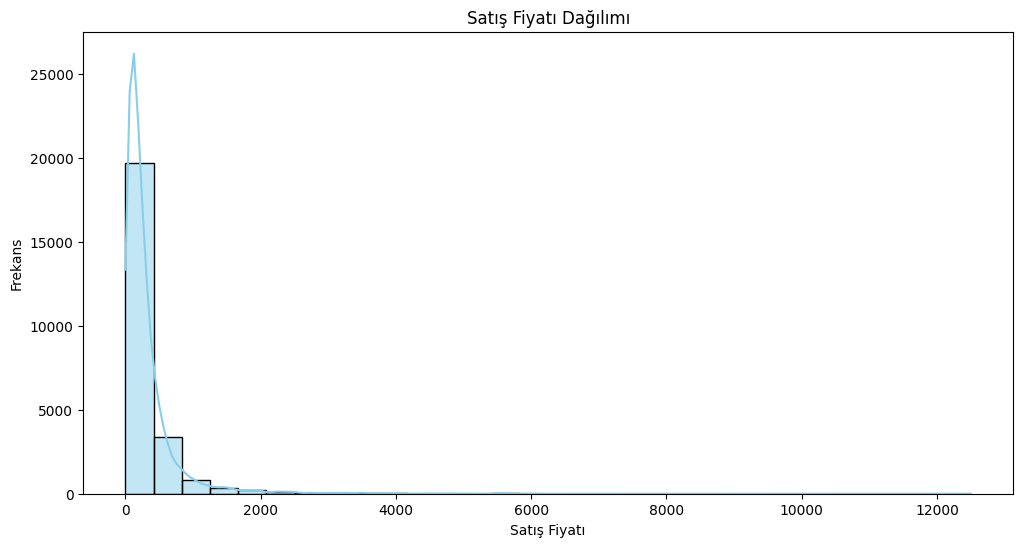

In [403]:
# Fiyat dağılımı

plt.figure(figsize=(12, 6))
sns.histplot(df['sale_price'], kde=True, bins=30, color='skyblue')
plt.title("Satış Fiyatı Dağılımı")
plt.xlabel("Satış Fiyatı")
plt.ylabel("Frekans")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


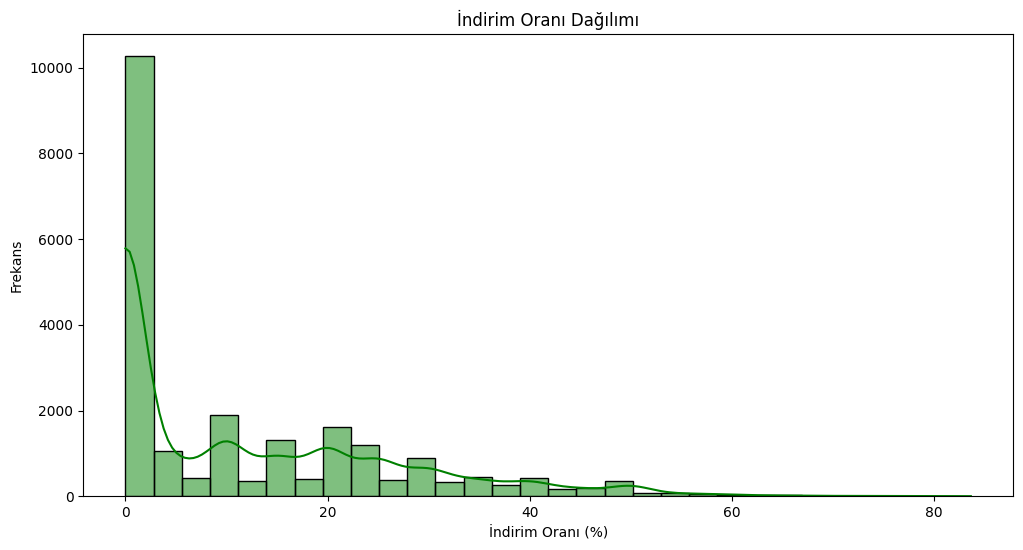

In [404]:
# İndirim dağılımı

plt.figure(figsize=(12, 6))
sns.histplot(df['discount'], kde=True, bins=30, color='green')
plt.title("İndirim Oranı Dağılımı")
plt.xlabel("İndirim Oranı (%)")
plt.ylabel("Frekans")
plt.show()

In [405]:
# Marka sayısal dağılımı
brand_counts = df['brand'].value_counts()

# En popüler 10 marka
top_brands = brand_counts.head(10)

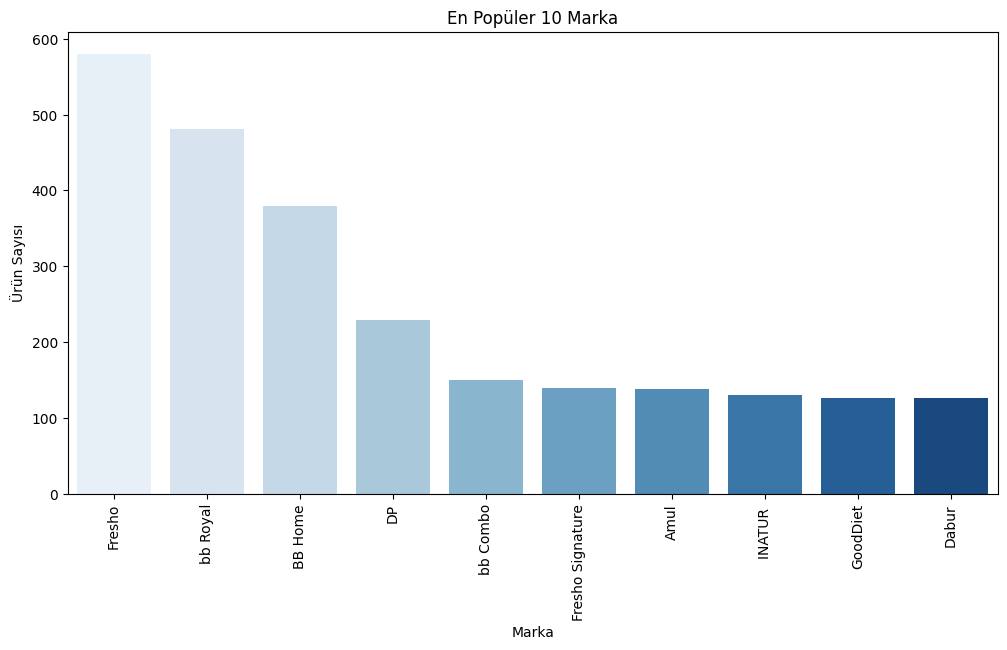

In [406]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='Blues')
plt.title("En Popüler 10 Marka")
plt.xlabel("Marka")
plt.ylabel("Ürün Sayısı")
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


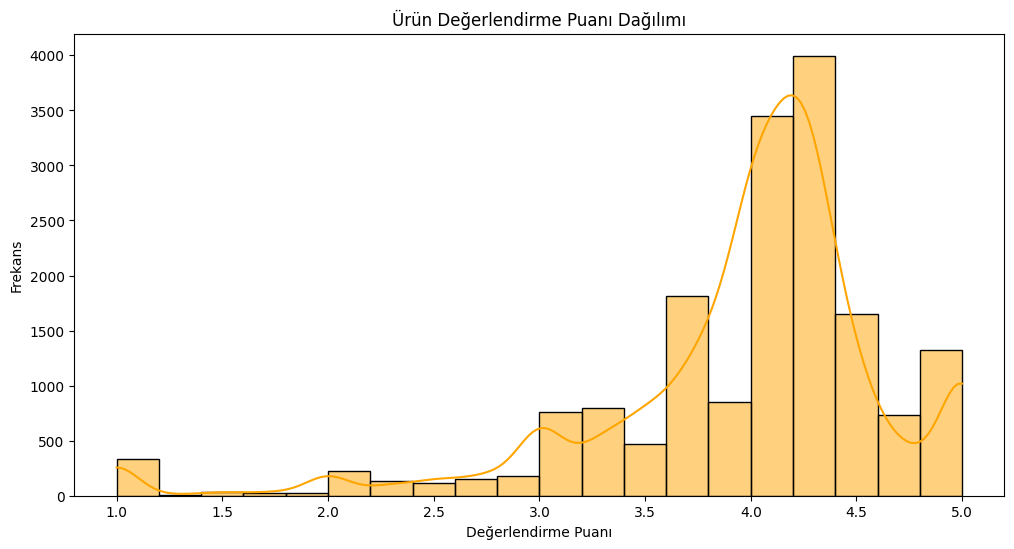

In [407]:
# Ürünlerin aldığı rating dağılımı
plt.figure(figsize=(12, 6))
sns.histplot(df['rating'], kde=True, bins=20, color='orange')
plt.title("Ürün Değerlendirme Puanı Dağılımı")
plt.xlabel("Değerlendirme Puanı")
plt.ylabel("Frekans")
plt.show()

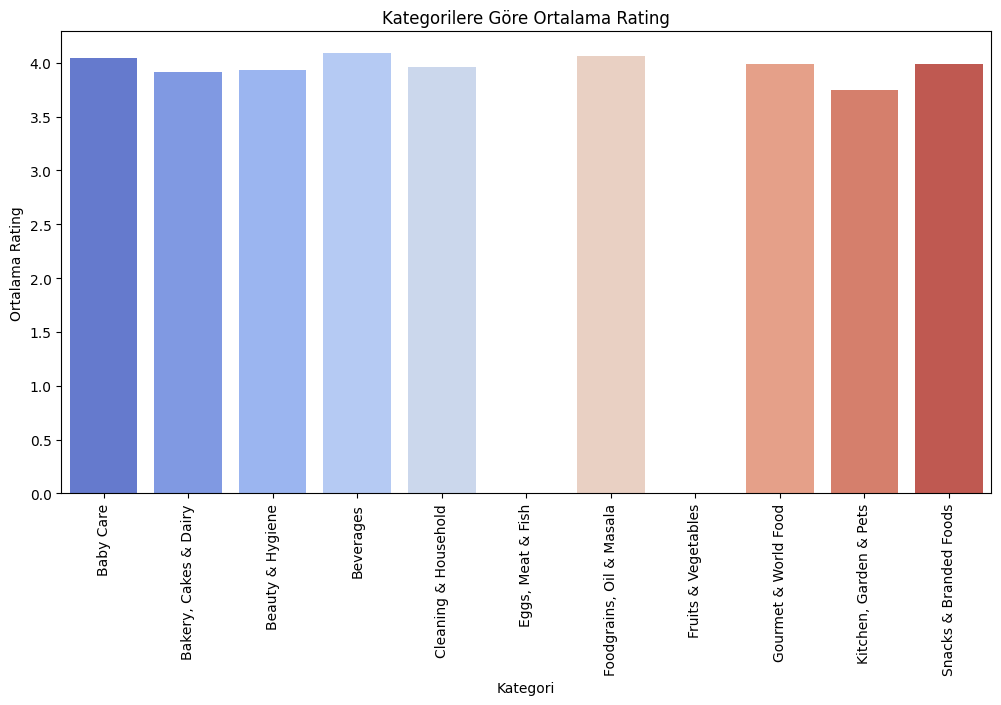

In [408]:
# Kategorilere göre ortalama rating
category_rating = df.groupby('category')['rating'].mean()


plt.figure(figsize=(12, 6))
sns.barplot(x=category_rating.index, y=category_rating.values, palette='coolwarm')
plt.title("Kategorilere Göre Ortalama Rating")
plt.xlabel("Kategori")
plt.ylabel("Ortalama Rating")
plt.xticks(rotation=90)
plt.show()

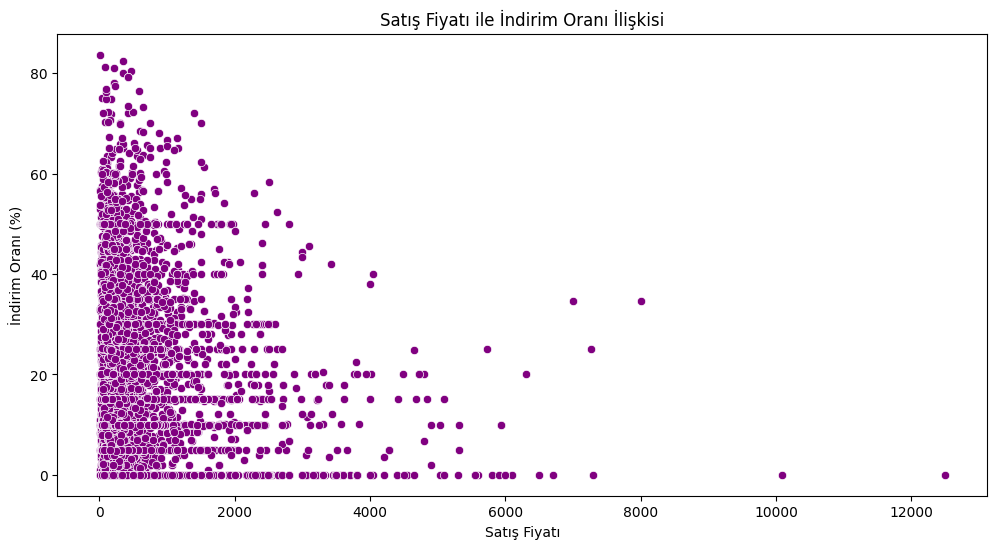

In [409]:
# Fiyat ve indirim arasındaki ilişki

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['sale_price'], y=df['discount'], color='purple')
plt.title("Satış Fiyatı ile İndirim Oranı İlişkisi")
plt.xlabel("Satış Fiyatı")
plt.ylabel("İndirim Oranı (%)")
plt.show()

In [410]:
# Tüm ürün açıklamalarını birleştirme

text = ' '.join(df['description'].dropna())

# WordCloud oluşturma

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

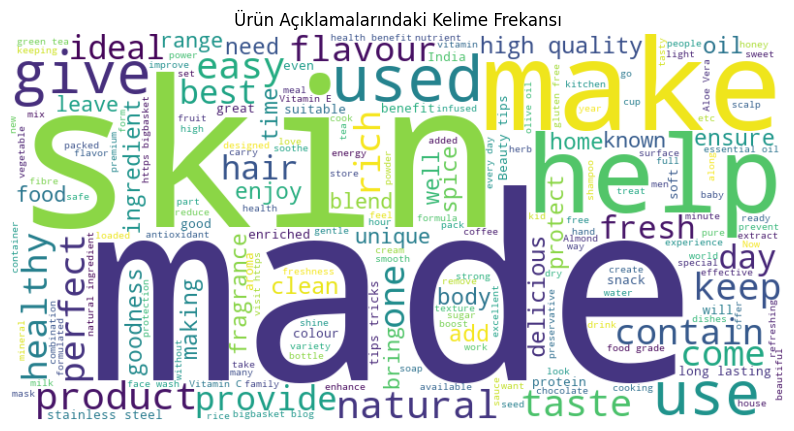

In [411]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ürün Açıklamalarındaki Kelime Frekansı")
plt.show()

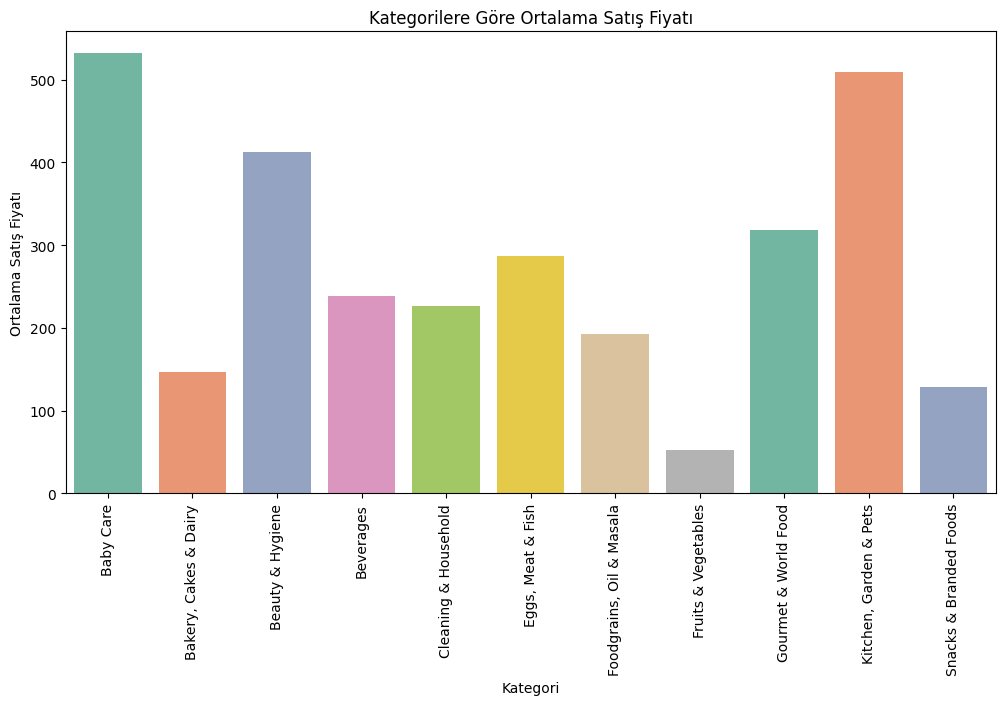

In [412]:
# Kategoriye göre satış fiyatı ortalamaları
category_avg_price = df.groupby('category')['sale_price'].mean()


plt.figure(figsize=(12, 6))
sns.barplot(x=category_avg_price.index, y=category_avg_price.values, palette='Set2')
plt.title("Kategorilere Göre Ortalama Satış Fiyatı")
plt.xlabel("Kategori")
plt.ylabel("Ortalama Satış Fiyatı")
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


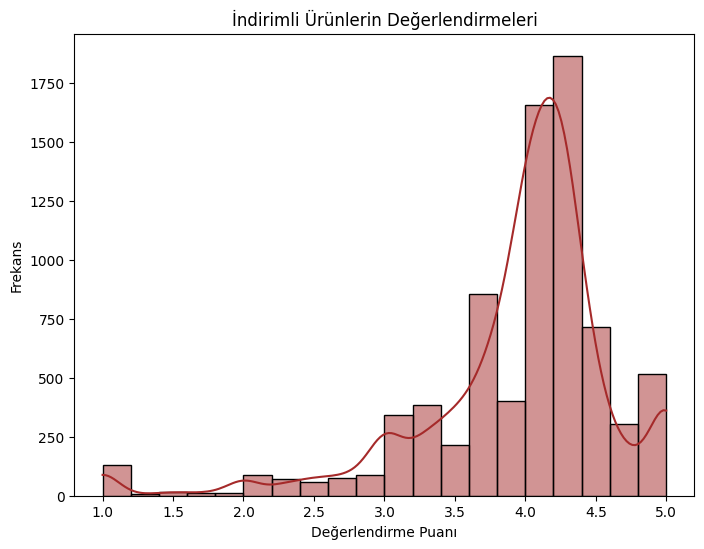

İndirimli ürünlerin ortalama değerlendirme puanı: 3.94


In [413]:
# İndirimli ürünlerin performansı (rating)
discounted_products = df[df['discount'] > 0]

# Ortalama rating
discounted_avg_rating = discounted_products['rating'].mean()

plt.figure(figsize=(8, 6))
sns.histplot(discounted_products['rating'], kde=True, bins=20, color='brown')
plt.title("İndirimli Ürünlerin Değerlendirmeleri")
plt.xlabel("Değerlendirme Puanı")
plt.ylabel("Frekans")
plt.show()

print(f"İndirimli ürünlerin ortalama değerlendirme puanı: {discounted_avg_rating:.2f}")


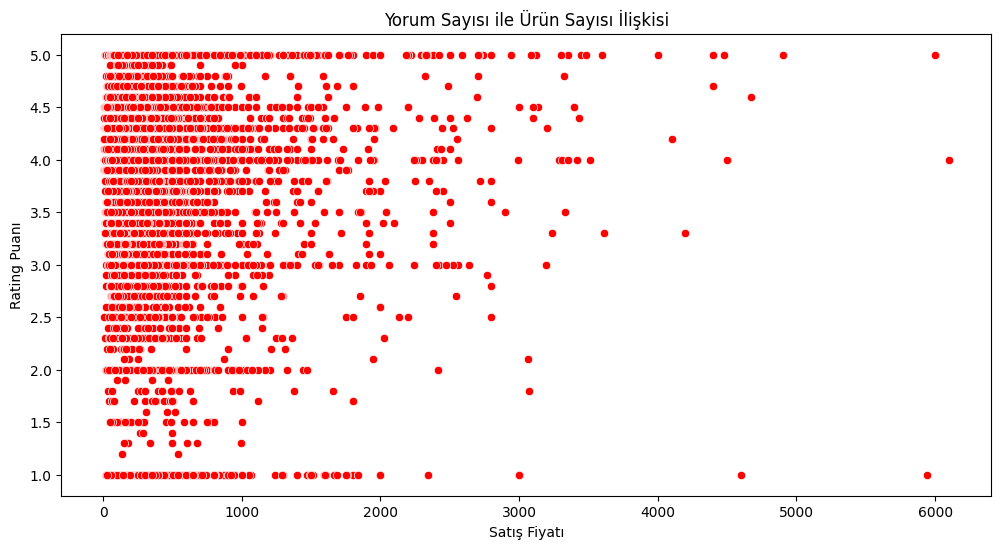

In [414]:
# Yorum sayısı ve ürün sayısı ilişkisi

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['sale_price'], y=df['rating'], color='red')
plt.title("Yorum Sayısı ile Ürün Sayısı İlişkisi")
plt.xlabel("Satış Fiyatı")
plt.ylabel("Rating Puanı")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


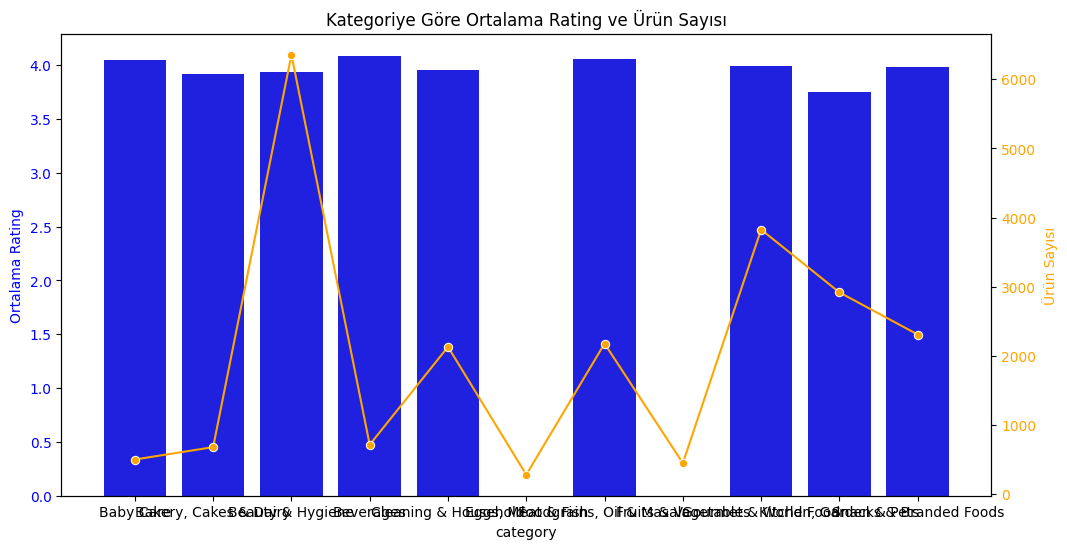

In [415]:
# Kategori başına ürün sayısı ve rating

category_performance = df.groupby('category').agg({'rating': 'mean', 'product': 'count'}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(x=category_performance['category'], y=category_performance['rating'], ax=ax1, color='blue')
ax1.set_ylabel("Ortalama Rating", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
sns.lineplot(x=category_performance['category'], y=category_performance['product'], ax=ax2, color='orange', marker='o')
ax2.set_ylabel("Ürün Sayısı", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title("Kategoriye Göre Ortalama Rating ve Ürün Sayısı")
plt.xticks(rotation=90)
plt.show()


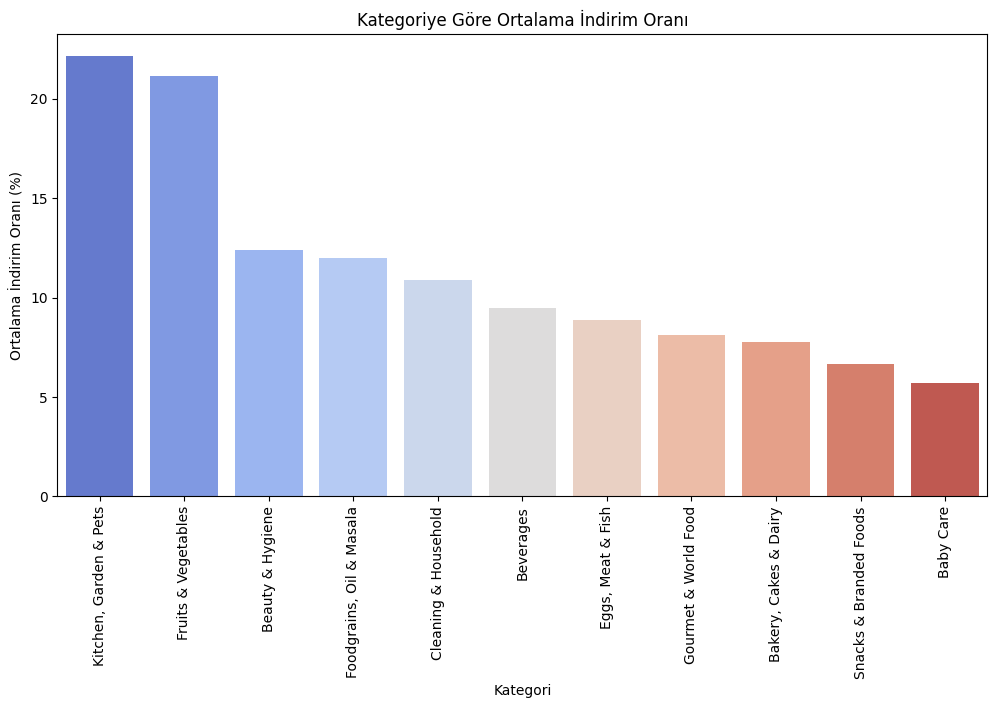

In [416]:
# Kategoriye göre ortalama indirim oranı

category_discount = df.groupby('category')['discount'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_discount.index, y=category_discount.values, palette='coolwarm')
plt.title("Kategoriye Göre Ortalama İndirim Oranı")
plt.xlabel("Kategori")
plt.ylabel("Ortalama İndirim Oranı (%)")
plt.xticks(rotation=90)
plt.show()


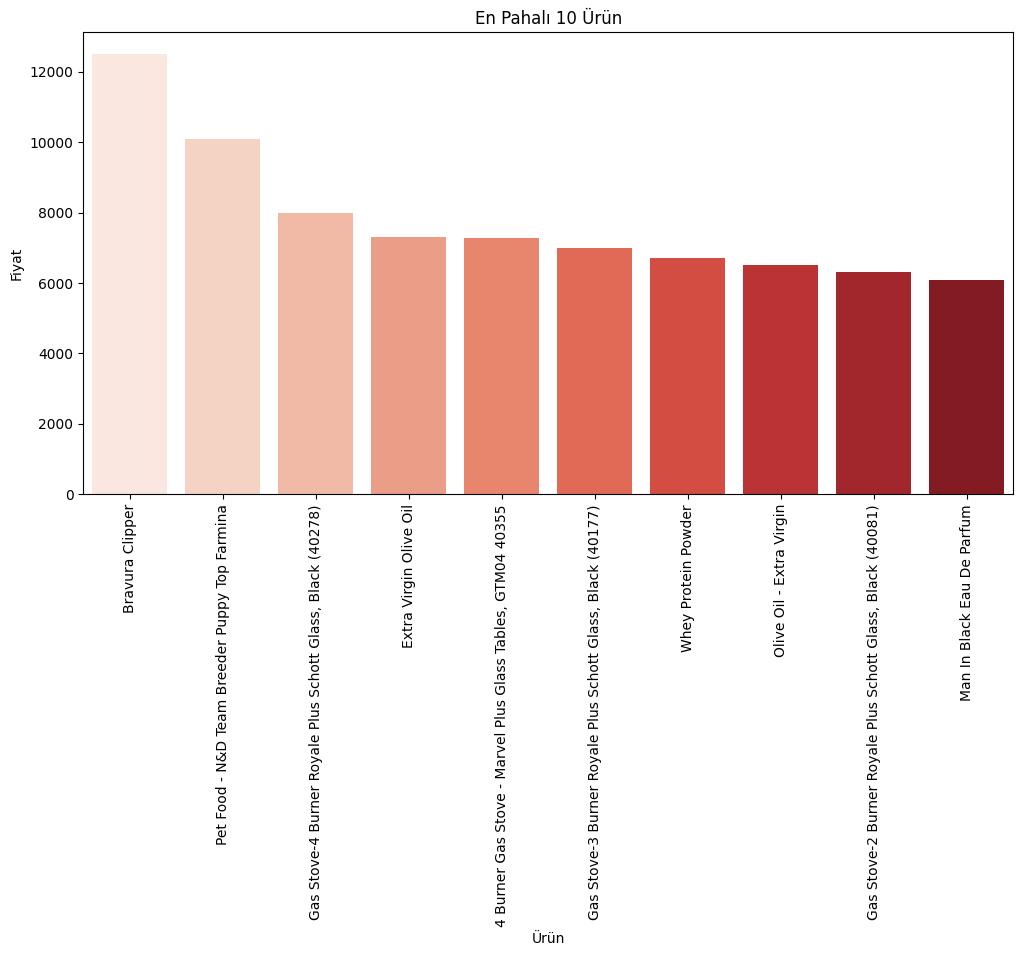

In [417]:
# En pahalı ve en ucuz ürünler

top_expensive = df.nlargest(10, 'sale_price')
top_cheap = df.nsmallest(10, 'sale_price')

# En pahalı ürünler

plt.figure(figsize=(12, 6))
sns.barplot(x=top_expensive['product'], y=top_expensive['sale_price'], palette='Reds')
plt.title("En Pahalı 10 Ürün")
plt.xlabel("Ürün")
plt.ylabel("Fiyat")
plt.xticks(rotation=90)
plt.show()

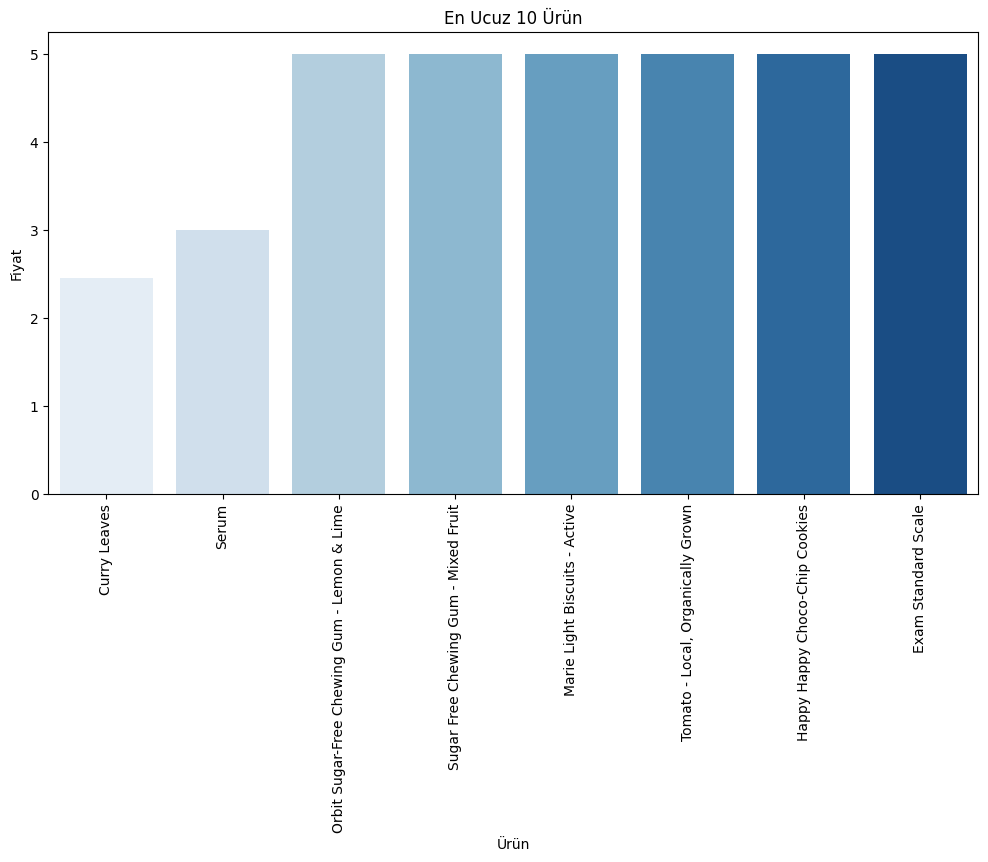

In [418]:
# En ucuz ürünler

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cheap['product'], y=top_cheap['sale_price'], palette='Blues')
plt.title("En Ucuz 10 Ürün")
plt.xlabel("Ürün")
plt.ylabel("Fiyat")
plt.xticks(rotation=90)
plt.show()

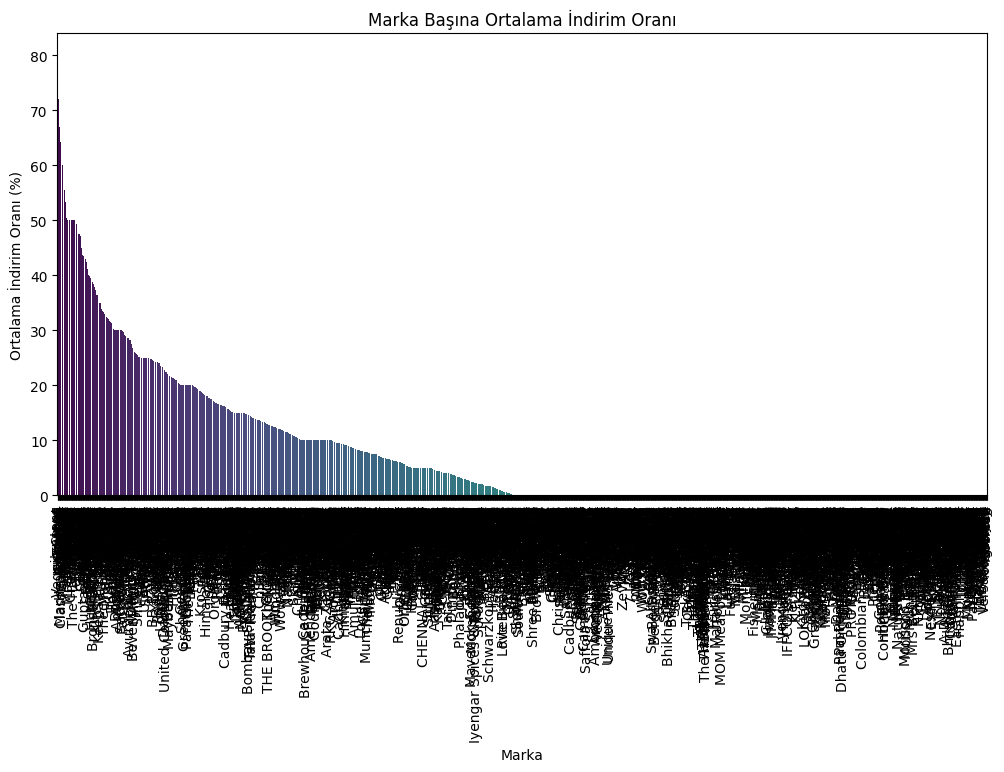

In [419]:
# Marka başına ortalama indirim oranı

brand_discount = df.groupby('brand')['discount'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=brand_discount.index, y=brand_discount.values, palette='viridis')
plt.title("Marka Başına Ortalama İndirim Oranı")
plt.xlabel("Marka")
plt.ylabel("Ortalama İndirim Oranı (%)")
plt.xticks(rotation=90)
plt.show()


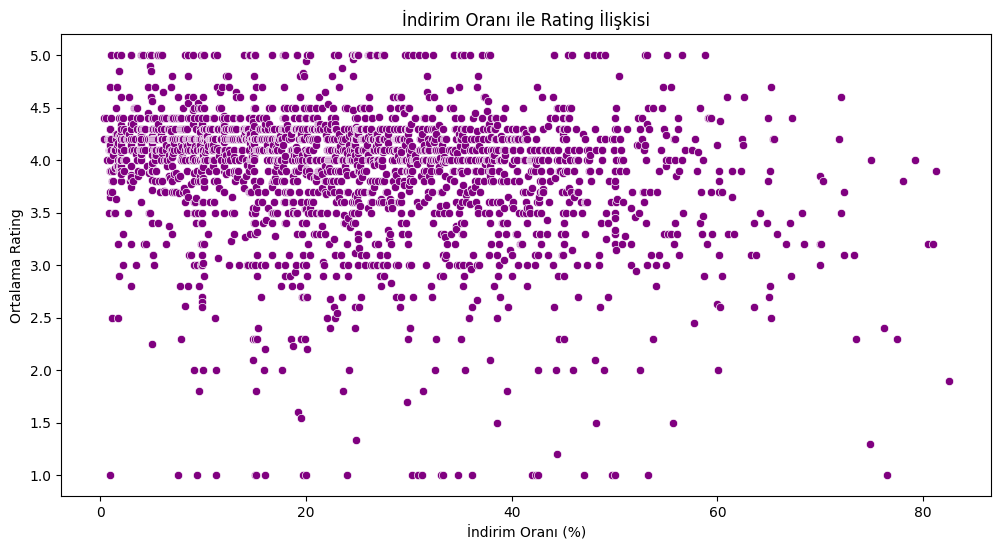

In [420]:
# İndirimli ürünlerin rating ortalaması


discounted_avg_rating = discounted_products.groupby('discount')['rating'].mean()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=discounted_avg_rating.index, y=discounted_avg_rating.values, color='purple')
plt.title("İndirim Oranı ile Rating İlişkisi")
plt.xlabel("İndirim Oranı (%)")
plt.ylabel("Ortalama Rating")
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Beauty & Hygiene'),
  Text(1, 0, 'Kitchen, Garden & Pets'),
  Text(2, 0, 'Cleaning & Household'),
  Text(3, 0, 'Gourmet & World Food'),
  Text(4, 0, 'Foodgrains, Oil & Masala'),
  Text(5, 0, 'Snacks & Branded Foods'),
  Text(6, 0, 'Beverages'),
  Text(7, 0, 'Bakery, Cakes & Dairy'),
  Text(8, 0, 'Baby Care'),
  Text(9, 0, 'Fruits & Vegetables'),
  Text(10, 0, 'Eggs, Meat & Fish')])

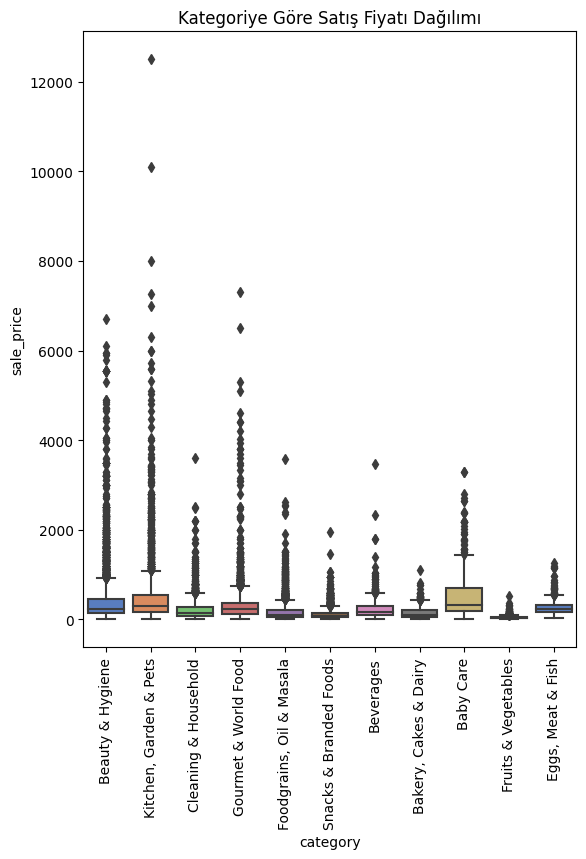

In [421]:
# Fiyat ve Rating Kategorilere Göre Dağılımı

plt.figure(figsize=(14, 8))

# Fiyat Boxplot

plt.subplot(1, 2, 1)
sns.boxplot(x='category', y='sale_price', data=df, palette='muted')
plt.title("Kategoriye Göre Satış Fiyatı Dağılımı")
plt.xticks(rotation=90)



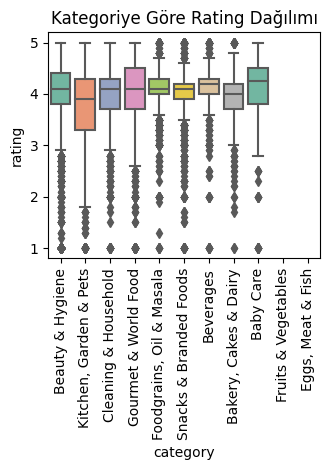

In [422]:
# Rating Boxplot

plt.subplot(1, 2, 2)
sns.boxplot(x='category', y='rating', data=df, palette='Set2')
plt.title("Kategoriye Göre Rating Dağılımı")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

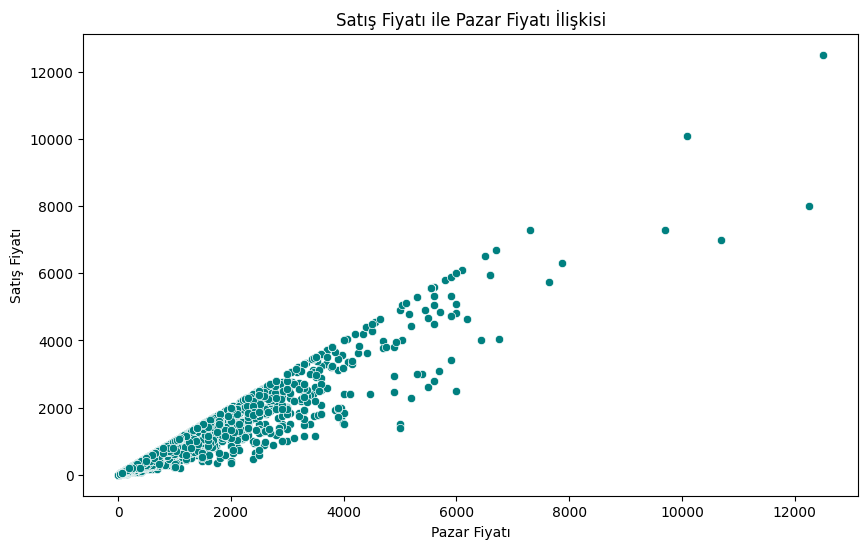

In [423]:
# Satış Fiyatı ve Pazar Fiyatı İlişkisi
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['market_price'], y=df['sale_price'], color='teal')
plt.title("Satış Fiyatı ile Pazar Fiyatı İlişkisi")
plt.xlabel("Pazar Fiyatı")
plt.ylabel("Satış Fiyatı")
plt.show()

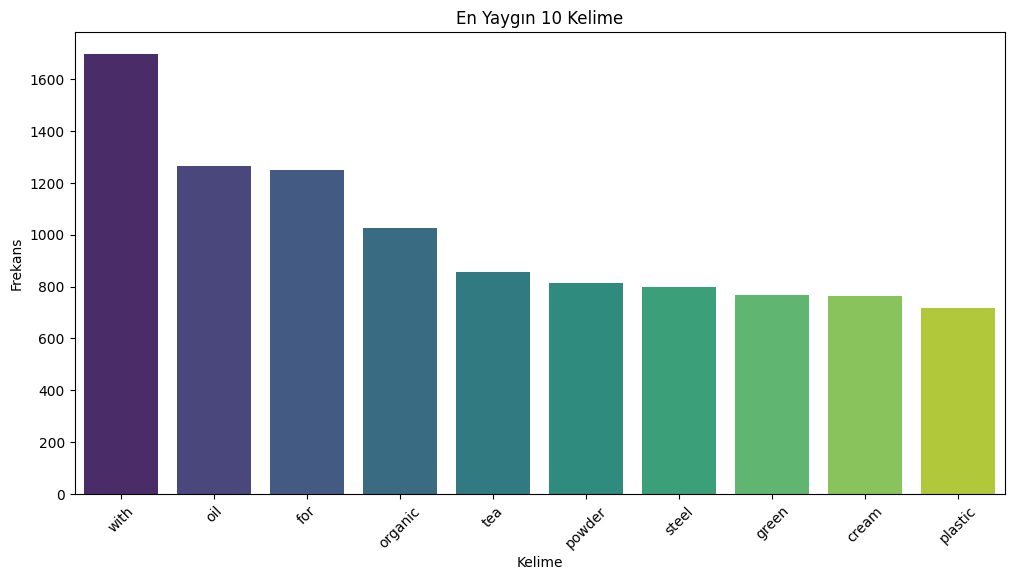

In [424]:
# Başlıklarda kelime frekansını analiz etme

from collections import Counter
import re

# Başlıkları birleştirme

titles = ' '.join(df['product'].dropna())

# Temizleme ve kelime frekansı analizi

words = re.findall(r'\w+', titles.lower())
word_counts = Counter(words)

# En yaygın 10 kelime

common_words = word_counts.most_common(10)

words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Frequency', data=words_df, palette='viridis')
plt.title("En Yaygın 10 Kelime")
plt.xlabel("Kelime")
plt.ylabel("Frekans")
plt.xticks(rotation=45)
plt.show()

# en fazla kullanılan kelimelerin with, for ve oil olduklarını görmekteyiz

/tmp/ipykernel_30/3619958762.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_rating = df.groupby('price_rating_segment')['rating'].mean()


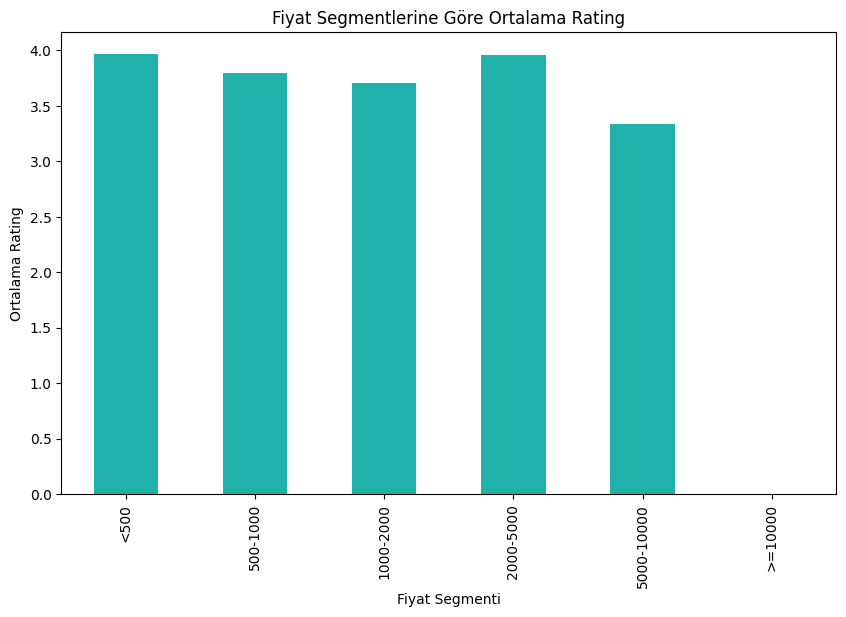

In [425]:
# Fiyat ve Rating'e göre segment oluşturma

df['price_rating_segment'] = pd.cut(df['sale_price'], bins=[0, 500, 1000, 2000, 5000, 10000, np.inf],
                                    labels=['<500', '500-1000', '1000-2000', '2000-5000', '5000-10000', '>=10000'])

# Segmentlere göre ortalama rating
segment_rating = df.groupby('price_rating_segment')['rating'].mean()

plt.figure(figsize=(10, 6))
segment_rating.plot(kind='bar', color='lightseagreen')
plt.title("Fiyat Segmentlerine Göre Ortalama Rating")
plt.xlabel("Fiyat Segmenti")
plt.ylabel("Ortalama Rating")
plt.show()


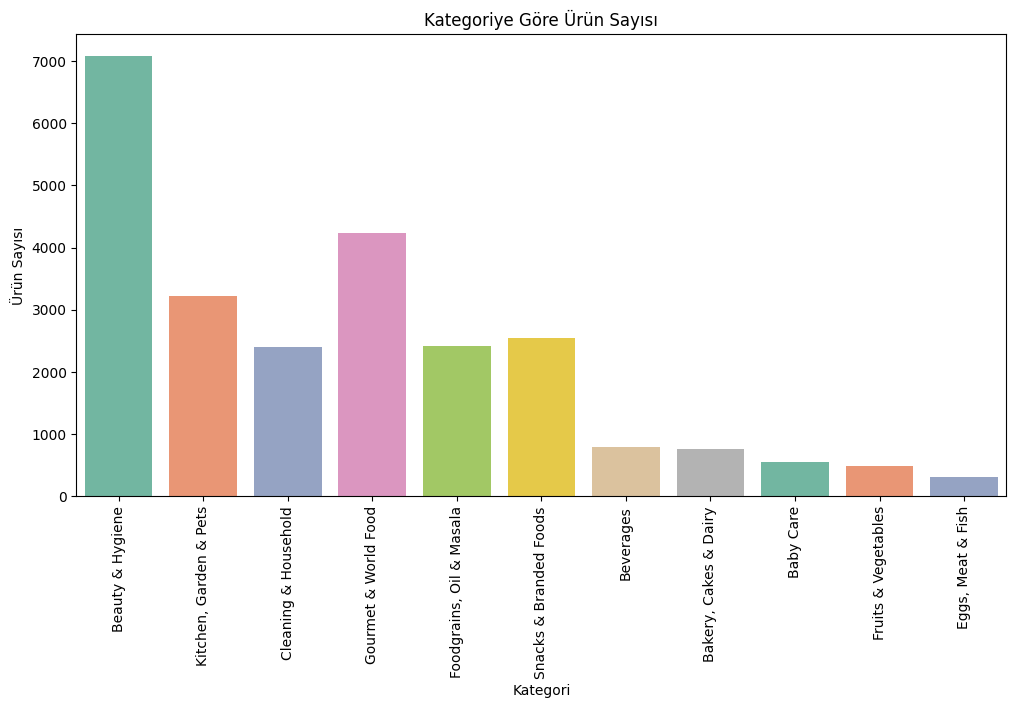

In [426]:
# Kategorilere göre ürünün dağılımını gözlemleme

plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=df, palette='Set2')
plt.title("Kategoriye Göre Ürün Sayısı")
plt.xlabel("Kategori")
plt.ylabel("Ürün Sayısı")
plt.xticks(rotation=90)
plt.show()


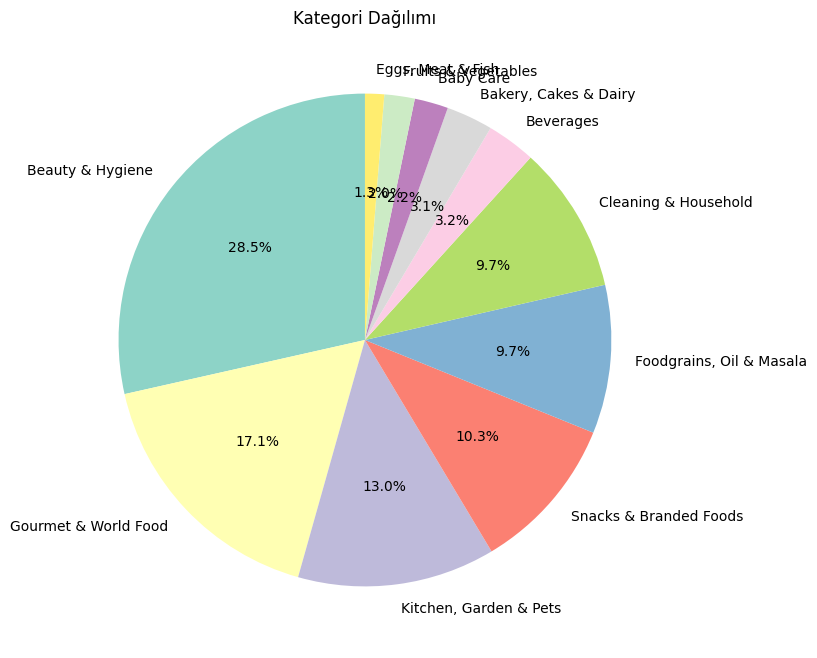

In [427]:
# Pie chart ile ürün kategori dağılımını ve yüzde oranlarını görüntüleme

category_counts = df['category'].value_counts()

plt.figure(figsize=(8, 8))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title("Kategori Dağılımı")
plt.ylabel('')
plt.show()


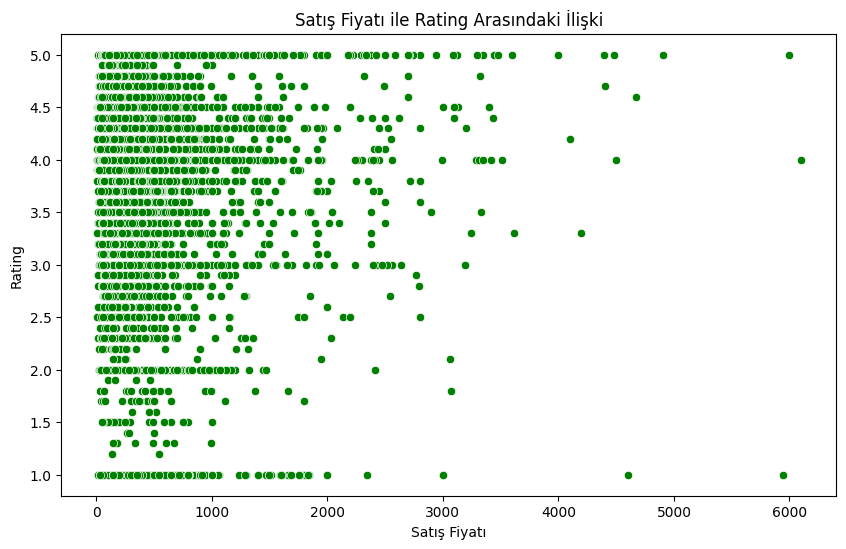

In [428]:
# Ürün fiyatı ve reyting arasındaki ilişkileri görüntüleme

plt.figure(figsize=(10, 6))
sns.scatterplot(x='sale_price', y='rating', data=df, color='green')
plt.title("Satış Fiyatı ile Rating Arasındaki İlişki")
plt.xlabel("Satış Fiyatı")
plt.ylabel("Rating")
plt.show()


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Face Wash - Oil Control, Active'),
  Text(1, 0, 'Plain Green Olives'),
  Text(2, 0, 'Topp Up Milk - Elaichi'),
  Text(3, 0, 'SPF 15 Sunscreen Lotion'),
  Text(4, 0, 'Soap'),
  Text(5, 0, 'Apple Cider Vinegar - Raw Unfiltered Unpasteurized with Cinamon & Honey'),
  Text(6, 0, 'Lavender & Vanilla Handmade Luxury Soap'),
  Text(7, 0, 'Chyawan Fit Sugarfree Chyawanprash - Natural Immunity Booster')])

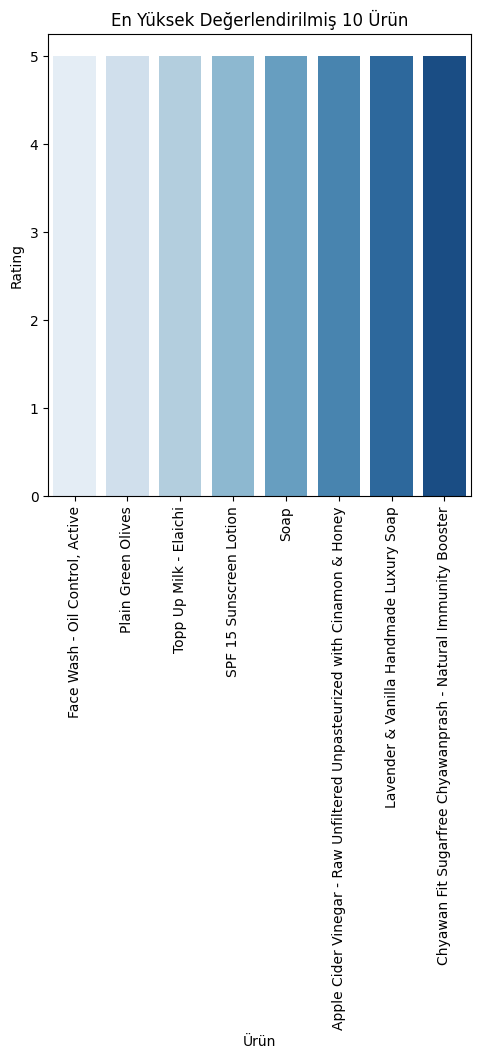

In [429]:
# En yüksek ve en düşük rating'e sahip ürünler

top_rated = df.nlargest(10, 'rating')
lowest_rated = df.nsmallest(10, 'rating')

plt.figure(figsize=(12, 6))

# En yüksek reytingli ürünler

plt.subplot(1, 2, 1)
sns.barplot(x=top_rated['product'], y=top_rated['rating'], palette='Blues')
plt.title("En Yüksek Değerlendirilmiş 10 Ürün")
plt.xlabel("Ürün")
plt.ylabel("Rating")
plt.xticks(rotation=90)

/tmp/ipykernel_30/3704582975.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


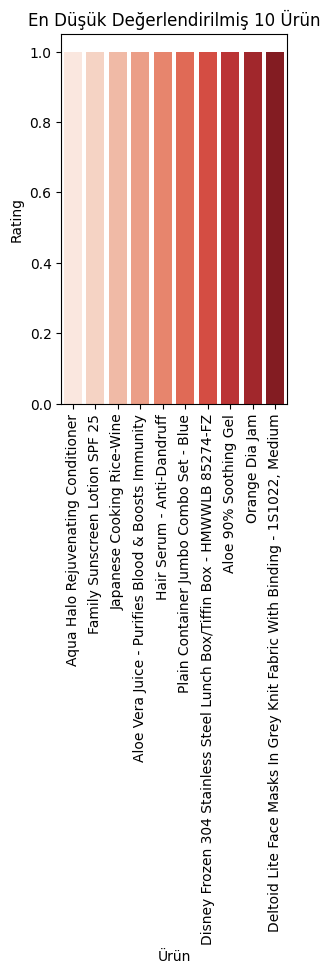

In [430]:
# En düşük reytingli ürünler

plt.subplot(1, 2, 2)
sns.barplot(x=lowest_rated['product'], y=lowest_rated['rating'], palette='Reds')
plt.title("En Düşük Değerlendirilmiş 10 Ürün")
plt.xlabel("Ürün")
plt.ylabel("Rating")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

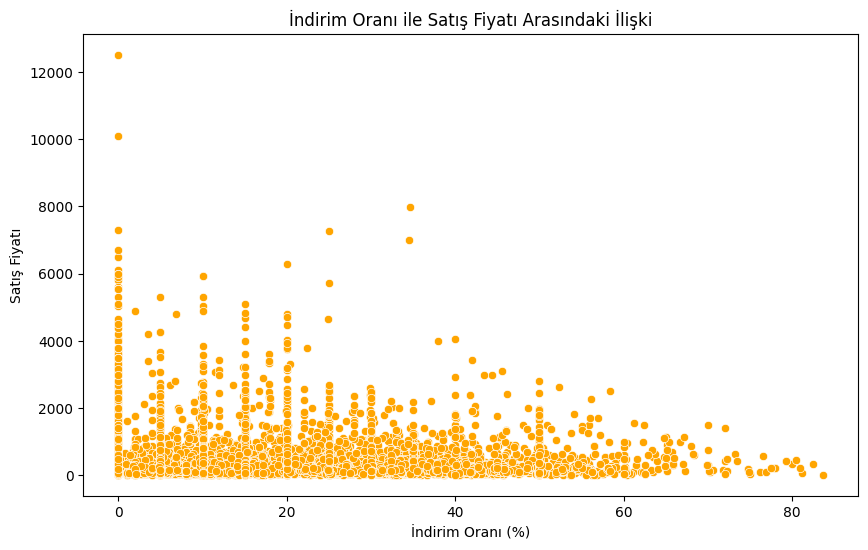

In [431]:
# İndirim oranı ve Satış Fiyatı arasındaki ilişki

plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount', y='sale_price', data=df, color='orange')
plt.title("İndirim Oranı ile Satış Fiyatı Arasındaki İlişki")
plt.xlabel("İndirim Oranı (%)")
plt.ylabel("Satış Fiyatı")
plt.show()

/tmp/ipykernel_30/2039549260.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_category_rating = df.groupby(['price_segment', 'category'])['rating'].mean().unstack()


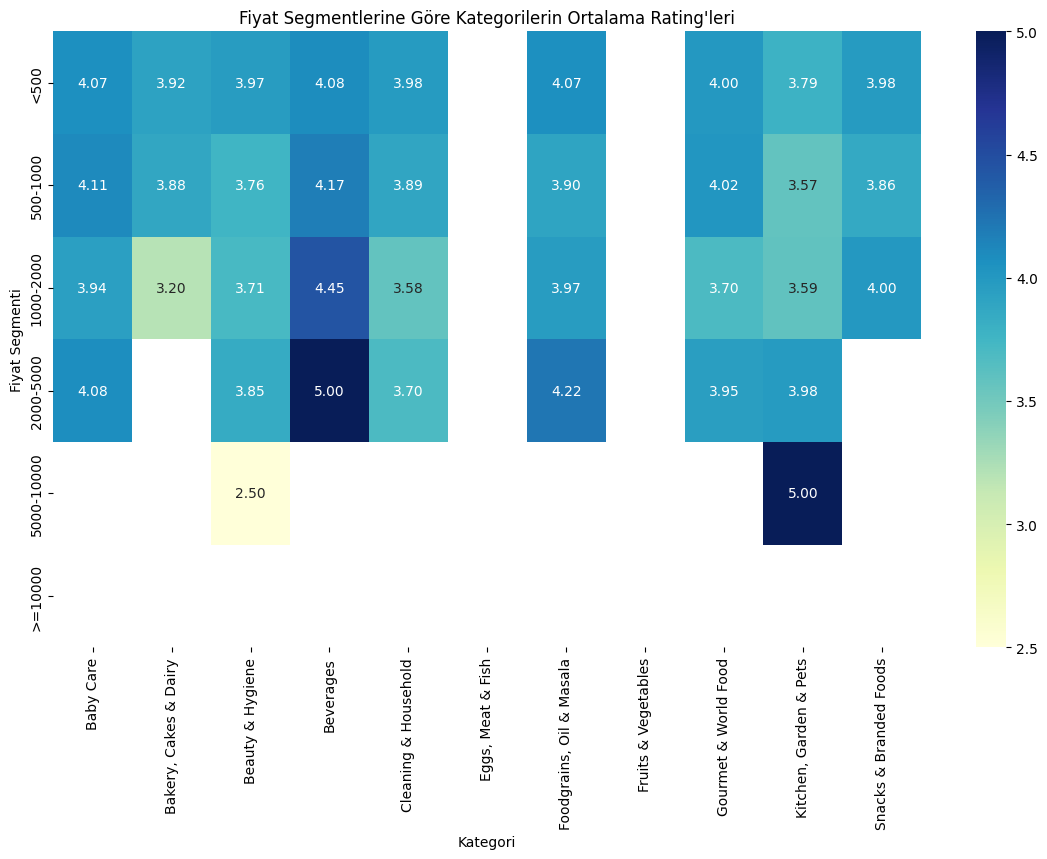

In [432]:
# Fiyat aralıklarına göre segmentasyon

price_bins = [0, 500, 1000, 2000, 5000, 10000, np.inf]
price_labels = ['<500', '500-1000', '1000-2000', '2000-5000', '5000-10000', '>=10000']
df['price_segment'] = pd.cut(df['sale_price'], bins=price_bins, labels=price_labels)

# Fiyat segmentlerine göre kategorilerin ortalama rating'leri

price_category_rating = df.groupby(['price_segment', 'category'])['rating'].mean().unstack()

plt.figure(figsize=(14, 8))
sns.heatmap(price_category_rating, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Fiyat Segmentlerine Göre Kategorilerin Ortalama Rating'leri")
plt.xlabel("Kategori")
plt.ylabel("Fiyat Segmenti")
plt.show()


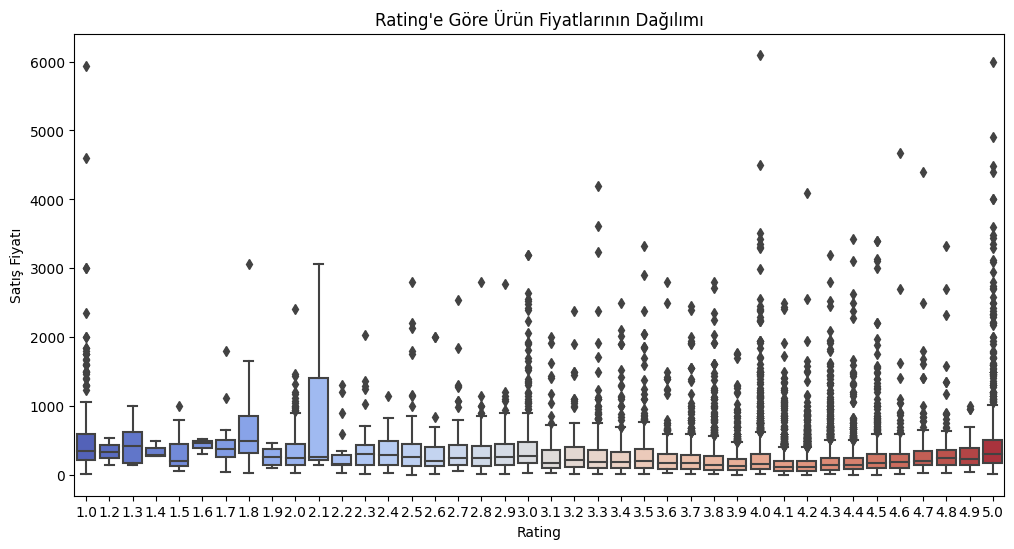

In [433]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='sale_price', data=df, palette='coolwarm')
plt.title("Rating'e Göre Ürün Fiyatlarının Dağılımı")
plt.xlabel("Rating")
plt.ylabel("Satış Fiyatı")
plt.show()

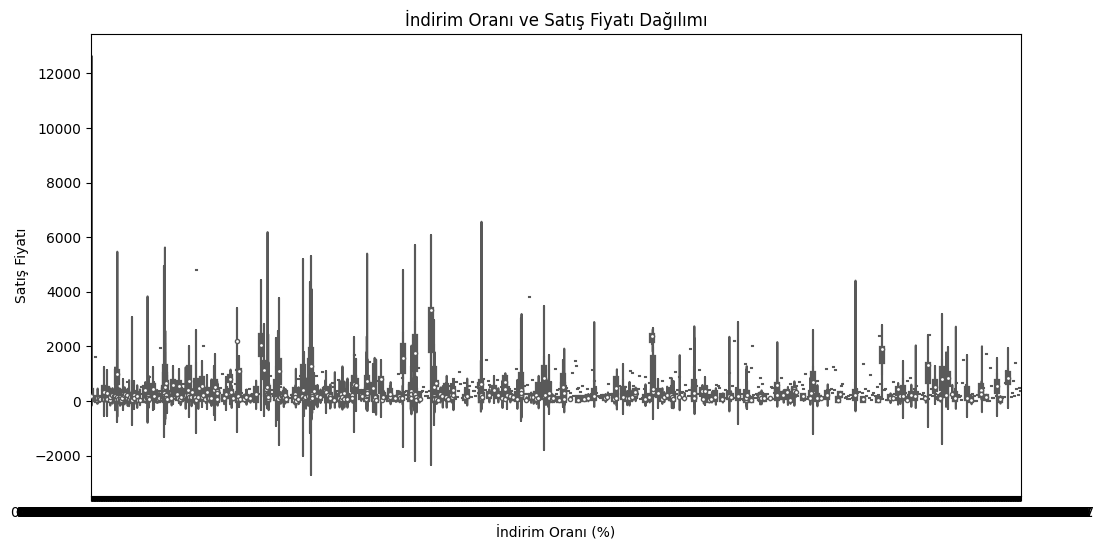

In [434]:
# İndirim oranı ve satış fiyatı ilişkisi

plt.figure(figsize=(12, 6))
sns.violinplot(x='discount', y='sale_price', data=df, palette='Set2')
plt.title("İndirim Oranı ve Satış Fiyatı Dağılımı")
plt.xlabel("İndirim Oranı (%)")
plt.ylabel("Satış Fiyatı")
plt.show()

/tmp/ipykernel_30/3624678468.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_rated_products = df.groupby('category').apply(lambda x: x.nlargest(3, 'rating'))


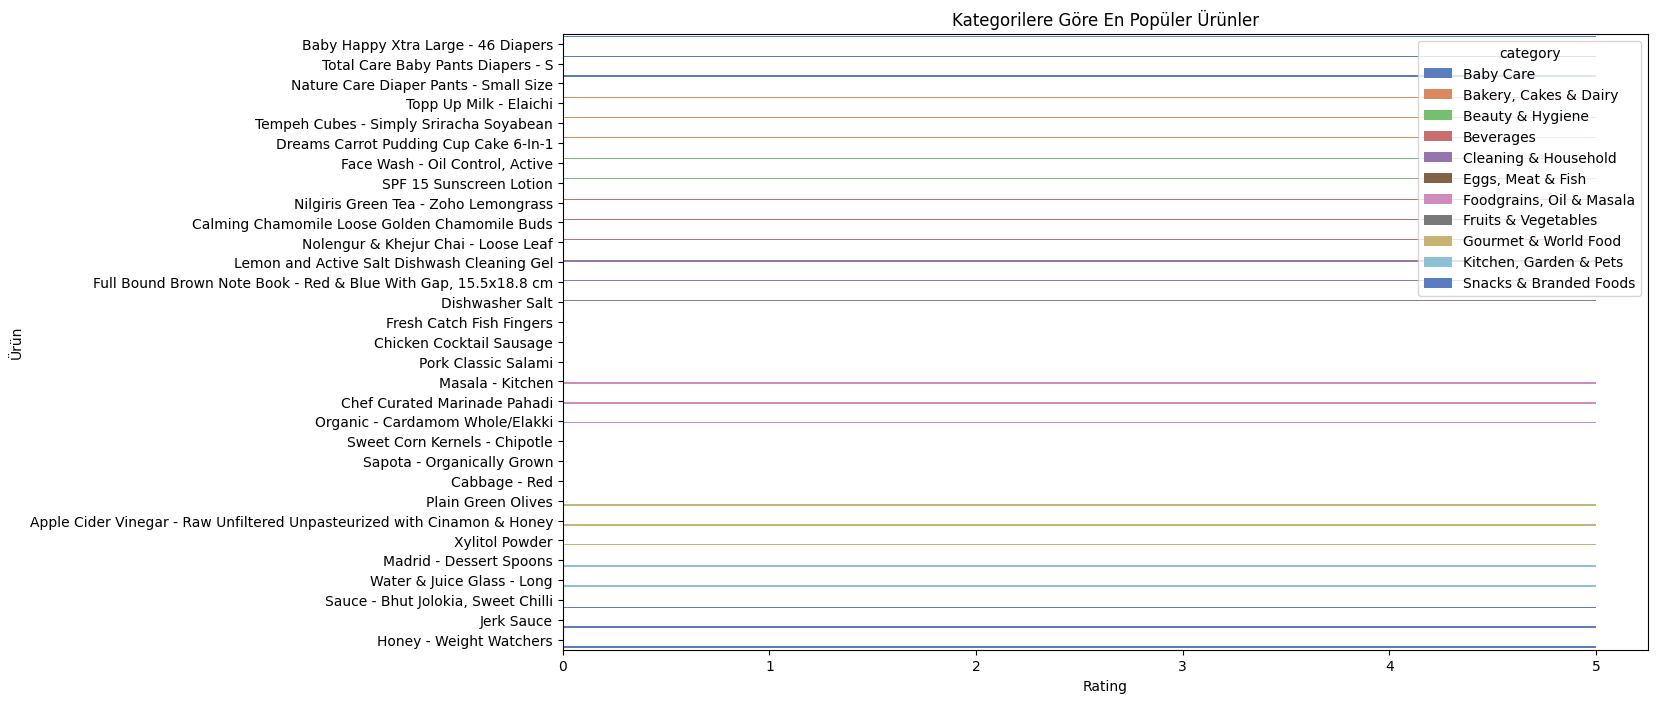

In [435]:
# Kategorilere göre en popüler ürünler (reytinglerini baz alıyoruz)

top_rated_products = df.groupby('category').apply(lambda x: x.nlargest(3, 'rating'))

plt.figure(figsize=(14, 8))
sns.barplot(x='rating', y='product', hue='category', data=top_rated_products, palette='muted')
plt.title("Kategorilere Göre En Popüler Ürünler")
plt.xlabel("Rating")
plt.ylabel("Ürün")
plt.show()

In [440]:
# IQR hesaplaması (Aykırı değerler için)

Q1_price = df['sale_price'].quantile(0.25)
Q3_price = df['sale_price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

Q1_rating = df['rating'].quantile(0.25)
Q3_rating = df['rating'].quantile(0.75)
IQR_rating = Q3_rating - Q1_rating
lower_bound_rating = Q1_rating - 1.5 * IQR_rating
upper_bound_rating = Q3_rating + 1.5 * IQR_rating

# Aykırı değerler
outliers_price_iqr = df[(df['sale_price'] < lower_bound_price) | (df['sale_price'] > upper_bound_price)]
outliers_rating_iqr = df[(df['rating'] < lower_bound_rating) | (df['rating'] > upper_bound_rating)]

print("Aykırı Değerler (Fiyat - IQR):")
print(outliers_price_iqr[['product', 'sale_price']])

print("Aykırı Değerler (Rating - IQR):")
print(outliers_rating_iqr[['product', 'rating']])


Aykırı Değerler (Fiyat - IQR):
                                                 product  sale_price
8      Biotin & Collagen Volumizing Hair Shampoo + Bi...     1098.00
47                                 Colour Catcher Sheets      799.00
51                                           Peach Syrup      850.00
69                Padded Harness - 3/4 inch, Grey Colour      840.00
91       Hard Anodised Ezee-Pour Saucepan With Lid - L88      864.50
...                                                  ...         ...
27498            Juicer - Fruit & Vegetable, Light Green     1071.00
27505                                 Virgin Coconut Oil      875.00
27514                     Verge & Sheer Perfume For Pair     1615.50
27538  Quista Pro Advanced Whey Protein Formula forti...     4500.00
27542                    Embellish Skin Lightening Serum     1525.75

[1978 rows x 2 columns]
Aykırı Değerler (Rating - IQR):
                                                 product  rating
1                  

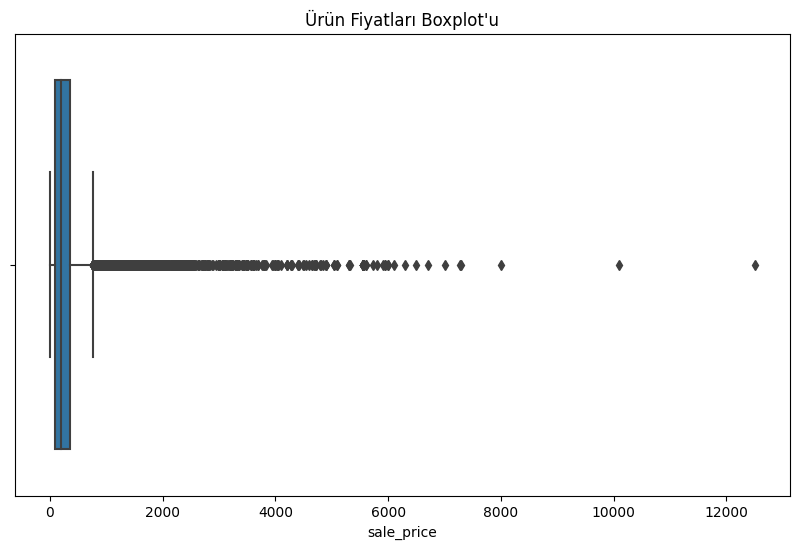

In [441]:
# Fiyat için boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['sale_price'])
plt.title("Ürün Fiyatları Boxplot'u")
plt.show()


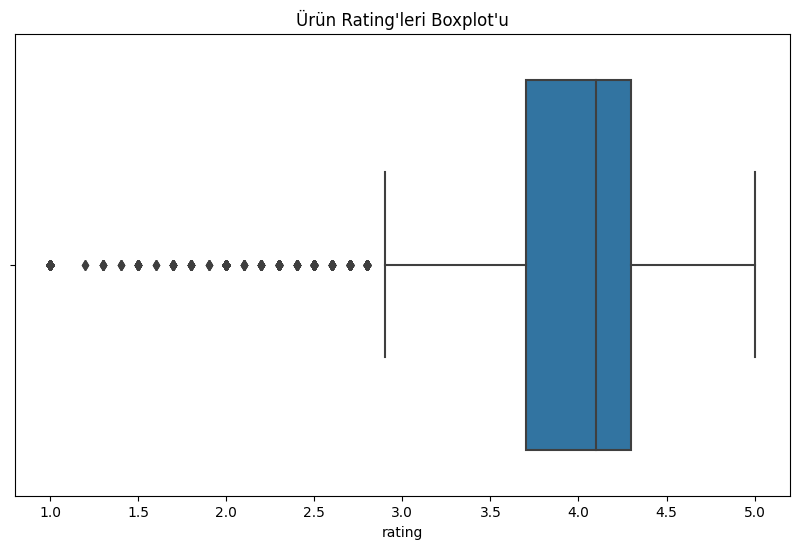

In [442]:
# Rating için boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['rating'])
plt.title("Ürün Rating'leri Boxplot'u")
plt.show()


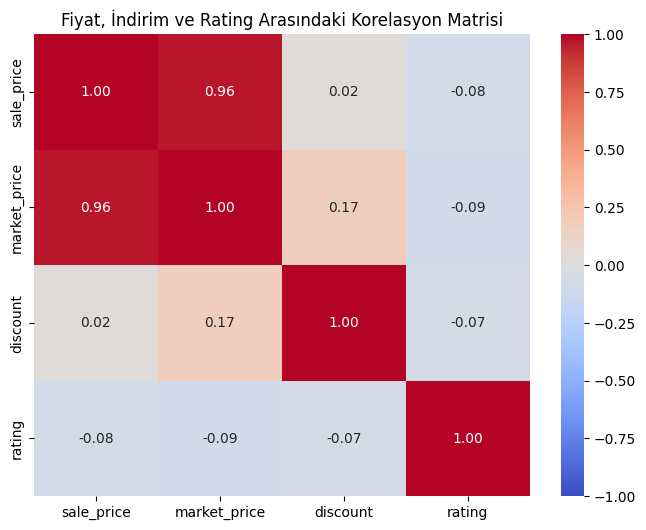

In [443]:
# Fiyat, İndirim ve Rating Korelasyon için ilgili sütunları seçelim

correlation_data = df[['sale_price', 'market_price', 'discount', 'rating']]

# Korelasyon matrisi hesaplanması
correlation_matrix = correlation_data.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Fiyat, İndirim ve Rating Arasındaki Korelasyon Matrisi")
plt.show()
